### 动态规划(Dynamic Programming)
- 金属分割问题

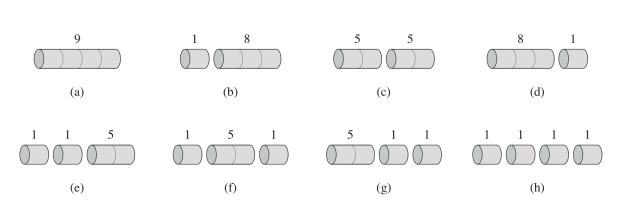

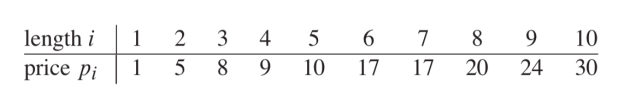

* 金属的不同长度分别分别对应不同的价格，比如说长度为1，则价格为1。    
* 由此想到可以创建一个字典去存储，长度key，和价值value。
* 为了方便修改和引用，这里使用defaultdict。

In [7]:
from collections import defaultdict

In [8]:
#创建价格字典，如果调用字典时发现key不存在，则默认value为0
price = defaultdict(int)
orginal_price  = [1,5,8,9,10,17,17,20,24,30]
for i,p in enumerate(orginal_price):
    price[i+1] = p

In [9]:
for i in range(11):
    print(price[i])

0
1
5
8
9
10
17
17
20
24
30


### 对于一个长度为n的金属，我们希望知道如何分割才能得到最大价格
### 例如一个长度3的金属，它可以看做[3, [2, 1], [1, 1, 1]]这三种分割方式

In [10]:
def r(n):
    return max(
    #一根金属首先可以考虑其最大长度的价格，即price[n]
    #另外还可以考虑分成长度为i和n-i的两块金属，即r(i)+r(n-i)
    #长度为i和n-i的两根金属，它们的最大价格也可以这样细分下去
    [price[n]] + [r(i) + r(n-i) for i in range(1,n)]
    #这里是列表的衔接
    )

In [11]:
#看一下列表的样子
print([price[3],r(2)+r(1),r(1)+r(2)])

[8, 6, 6]


In [43]:
#我们希望看到分割的方案
solution = {}
def r_new(n):
    max_price, max_split = max(
        [(price[n],0)] + [(r(i)+r(n-i),i) for i in range(i,n)],key = lambda x : x[0]
        #key在这里的意思是以max_price作为选择最大值的标准
    )
    #这里就有每一个长度对应的最佳分割点
    solution[n] = (n-max_split,max_split)
    return max_price

### 为了看到分割的方案，以及每次分割对不同长度金属调用的次数<br>
### 这里引入装饰器和语法糖去达到目标

- 由于函数也是一个对象，而且函数对象可以被赋值给变量，所以，通过变量也能调用该函数。

In [71]:
def foo():
    print('foo')
    
def bar(func):
    func()

bar(foo)

foo


- 装饰器本质上是一个 Python 函数或类，它可以让其他函数或类在不需要做任何代码修改的前提下增加额外功能，装饰器的返回值也是一个函数/类对象。
- 可以用于：插入日志、性能测试、事务处理、缓存、权限校验等场景，装饰器是解决这类问题的绝佳设计。
- 概括的讲，装饰器的作用就是为已经存在的对象添加额外的功能。

In [78]:
#现在有一个新的需求，希望可以记录下函数的执行日志，于是在代码中添加日志代码：
def use_logging(func):
    print('%s is running' % func.__name__)
    func()

def foo():
    print('I am foo')

use_logging(foo)

foo is running
I am foo


- use_logging 就是一个装饰器，它一个普通的函数，它把执行真正业务逻辑的函数 func 包裹在其中。
- foo 被 use_logging 装饰了一下，use_logging 返回的也是一个函数，这个函数的名字叫 wrapper

In [83]:
#我们希望调用foo就能直接将"func name is running"这一行直接打印出来，而不是用use_logging这个函数
def use_logging(func):
    def wrapper():
        print('%s is running' % func.__name__)
        # 把foo当做参数传递进来时，执行func()就相当于执行foo()
        return func()
    return wrapper

def foo():
    print('I am foo')
#函数foo作为变量传递给函数use_logging，输出为wrapper,把wrapper赋值给foo
foo = use_logging(foo)
#执行foo(),就相当于执行wrapper(),这里的wrapper已经包含了foo这个参数
foo()

foo is running
I am foo


-  @ 符号就是装饰器的语法糖，它放在函数开始定义的地方，这样就可以省略最后一步再次赋值的操作。
- 有了 @ ，我们就可以省去foo = use_logging(foo)这一句了，直接调用 foo() 即可得到想要的结果。

In [85]:
def use_logging(func):
    def wrapper():
        print('%s is running' % func.__name__)
        return func()
    return wrapper

@use_logging
def foo():
    print('I am foo')

foo()

foo is running
I am foo


- 但这里又出现了一个严重的问题，就是foo函数的被wrapper完全替代了，foo函数的__name__变成了wrapper

In [86]:
foo.__name__

'wrapper'

- 好在我们有functools.wraps，wraps本身也是一个装饰器，它能把原函数的元信息拷贝到装饰器里面的 func 函数中，这使得装饰器里面的 func 函数也有和原函数 foo 一样的元信息了。

In [24]:
from functools import wraps

def use_logging_1(func):
    @wraps(func)
    #把函数的元信息复制进wrapper
    def wrapper():
        print('%s is running' % func.__name__)
        return func()
    return wrapper

@use_logging_1
def foo():
    print('I am foo')

foo()

foo is running
I am foo


In [89]:
foo.__name__

'foo'

### 介绍完装饰器和语法糖之后，我们来实践一下

In [2]:
from collections import defaultdict

In [12]:
call_time_with_arg = defaultdict(int)
def r_2(n):
    fname = r_2.__name__
    #把函数和当前对应的n设为元组，此元组为字典的key，value就是这一组出现的次数
    call_time_with_arg[(fname,n)] += 1
    return max(
        [price[n]] + [r_2(i) + r_2(n-i) for i in range(1,n)]
    )

In [13]:
#长度为3时最大价值为8
r_2(3)

8

In [14]:
#当n等于3时，r_2(1)这个函数调用了6次
call_time_with_arg

defaultdict(int, {('r_2', 3): 1, ('r_2', 1): 6, ('r_2', 2): 2})

r(3) = max( [ price[3], r(2) + r(1), r(1) + r(2) ] ) r(1)出现两次 <br><br>
r(2) = max( [ price[2], r(1) + r(1) ] ) r(1)在r(2)中出现两次 <br><br> 
r(1)出现的次数就是，r(2)对应的两次，因为有两个r(2)，所以是四次，再加上两个r(1)，一共六次

In [16]:
#我们还可以对此进行排序
from collections import Counter

In [18]:
Counter(call_time_with_arg).most_common()

[(('r_2', 1), 6), (('r_2', 2), 2), (('r_2', 3), 1)]

- r_2()函数内置生成字典的语法后，可以帮助函数进行计数，这固然很好，但这也改变了函数的结构。<br><br>
- 所以需要装饰器，在不改变r_2函数的基础上去附带一个计数的功能。

In [27]:
called_time_witg_arg = defaultdict(int)

def get_call_time(f):
    """@param f is a function"""
    #为了不改变函数的元信息，这里使用wrap
    @wraps(f)
    def warp(n):
        """I am a warpper"""
        result = f(n)
        called_time_witg_arg[(f.__name__, n)] += 1
        return result
    return warp

In [28]:
@get_call_time
def add_ten(n):
    return n + 10

In [35]:
#执行五次
add_ten(10)

20

In [36]:
#可以看到函数调用了几次
called_time_witg_arg

defaultdict(int, {('add_ten', 10): 5})

- 加入r_3()函数

In [52]:
@get_call_time
def r_3(n):
    """
    n is length or iron
    return is max price
    """
    max_price = max(
        [price[n]] + [r_3(i) + r_3(n-i) for i in range(1,n)]
    )
    return max_price

In [53]:
#在不改变函数信息的情况下，也能直接用函数
help(r_3)

Help on function r_3 in module __main__:

r_3(n)
    n is length or iron
    return is max price



In [58]:
#当n=15的时候，计算速度十分的慢
r_3(15)

43

In [59]:
def memo(f):
    already_computed = {}
    @wraps(f)
    def _wrap(arg):
        result = None
        if arg in already_computed:
            result = already_computed[arg]
        else:
            result = f(arg)
            already_computed[arg] = result
        return result
    return _wrap

In [60]:
@memo
def r_4(n):
    return max(
    [price[n]] + [r(i)+r(n-i) for i in range(1,n)]
    )

In [68]:
#纳秒级别的运算
%timeit r_4(9)

329 ns ± 41.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [66]:
#毫秒级别的运算
%timeit r_3(9)

14.5 ms ± 669 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


 - 在知道长度对应最优价格的情况下，我们希望能知道金属该怎么进行分割比较好

In [80]:
memo.already_computed = {}
solution = {}

In [81]:
@memo
def r_5(n):
    max_price,max_split = max(
     [(price[n],0)] + [(r_5(i)+r_5(n-i),i) for i in range(1,n)],key=lambda x: x[0]
    )
    solution[n] = (n - max_split, max_split)
    return max_price

In [82]:
r_5(38)

112

In [83]:
solution

{1: (1, 0),
 2: (2, 0),
 3: (3, 0),
 4: (2, 2),
 5: (3, 2),
 6: (6, 0),
 7: (6, 1),
 8: (6, 2),
 9: (6, 3),
 10: (10, 0),
 11: (10, 1),
 12: (10, 2),
 13: (10, 3),
 14: (12, 2),
 15: (13, 2),
 16: (10, 6),
 17: (16, 1),
 18: (16, 2),
 19: (16, 3),
 20: (10, 10),
 21: (20, 1),
 22: (20, 2),
 23: (20, 3),
 24: (22, 2),
 25: (23, 2),
 26: (20, 6),
 27: (26, 1),
 28: (26, 2),
 29: (26, 3),
 30: (20, 10),
 31: (30, 1),
 32: (30, 2),
 33: (30, 3),
 34: (32, 2),
 35: (33, 2),
 36: (30, 6),
 37: (36, 1),
 38: (36, 2)}

- 有了solution以后，可以对照solution的结果去不断“查表”,从而获得最优价格 <br><br>
- 38对应(36,2),36对应(30,6),2对应(2,0)，这样类推下去<br><br>
- 于是我们可以定义一个解析函数，将最佳结果排列出来

In [85]:
def parse_solution(n):
    left_split,right_split = solution[n]
    #如果右边为0则说明，左边的点就是最佳点
    if right_split == 0:
        return [left_split]
    return parse_solution(left_split) + parse_solution(right_split)

In [86]:
parse_solution(38)

[10, 10, 10, 6, 2]

### 总结一下动态规划的三个特点<br> 
- 很多重复的子问题 <br><br>
- 子问题可以存在表中<br><br>
- 结果可以解析